In [1]:
import ast
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from collections import defaultdict
from os.path import join
from comm_data import PreprocessedCommData

import sys
sys.path.append("..")

from seal.trainer.communication import *

LOOSELY_DASHED = (0, (5, 10))
custom_params = {
    "axes.grid": True,
    # "axes.grid.linestyle": LOOSELY_DASHED,
    # "axes.grid.which": "both",
    "axes.spines.top": True,
    "axes.spines.right": True, 
    "axes.spines.top": True,
    "axes.spines.top": True,
}
sns.set_style("ticks", custom_params)

In [2]:
paths = []
dfs = []
for intersection in ["grid-3x3", "grid-5x5", "double"]:
    for ranked in [False, True]:
        ranked_str = "ranked" if ranked else "unranked"
        paths.extend([
            # join("..", "out", "data", "Final", "FedRL", intersection, f"v3_neg-reward-aggr_{ranked_str}.xlsx"),
            join("..", "out", "data", "Final", "FedRL", intersection, f"v3_traffic-aggr_{ranked_str}.csv"),
            join("..", "out", "data", "Final", "MARL",  intersection, f"v3_{ranked_str}.csv"),
            join("..", "out", "data", "Final", "SARL",  intersection, f"v3_{ranked_str}.csv")
        ])
        dfs.extend([
            PreprocessedCommData.preprocess(path, ranked=ranked, intersection=intersection)
            for path in paths
        ])

df = pd.concat(dfs)
df.reset_index(inplace=True)
df.head()

SyntaxError: unexpected EOF while parsing (<unknown>, line 1)

In [3]:
df.query("trainer == 'FedRL' and intersection == 'grid-3x3' and ranked == False and comm_type == 'edge-to-tls-rank-comms'").head()

,index,round,intersection,timesteps_total,trainer,iteration,ranked,weight_aggr_fn,episode_reward_mean,comm_cost,comm_type,total_comm_cost
4,4,0,grid-3x3,4000,FedRL,1,False,traffic,-25.106529,0,edge-to-tls-rank-comms,424458
10,10,1,grid-3x3,8000,FedRL,2,False,traffic,-24.000457,0,edge-to-tls-rank-comms,410103
16,16,2,grid-3x3,12000,FedRL,3,False,traffic,-23.516477,0,edge-to-tls-rank-comms,404211
22,22,3,grid-3x3,16000,FedRL,4,False,traffic,-23.245710,0,edge-to-tls-rank-comms,401604
28,28,4,grid-3x3,20000,FedRL,5,False,traffic,-23.189257,0,edge-to-tls-rank-comms,411145


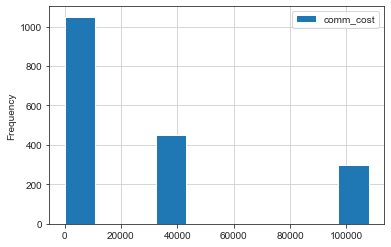

In [3]:
df.query("ranked == False and comm_type == 'edge-to-tls-rank-comms'").plot(kind="hist", y="comm_cost")
plt.show()

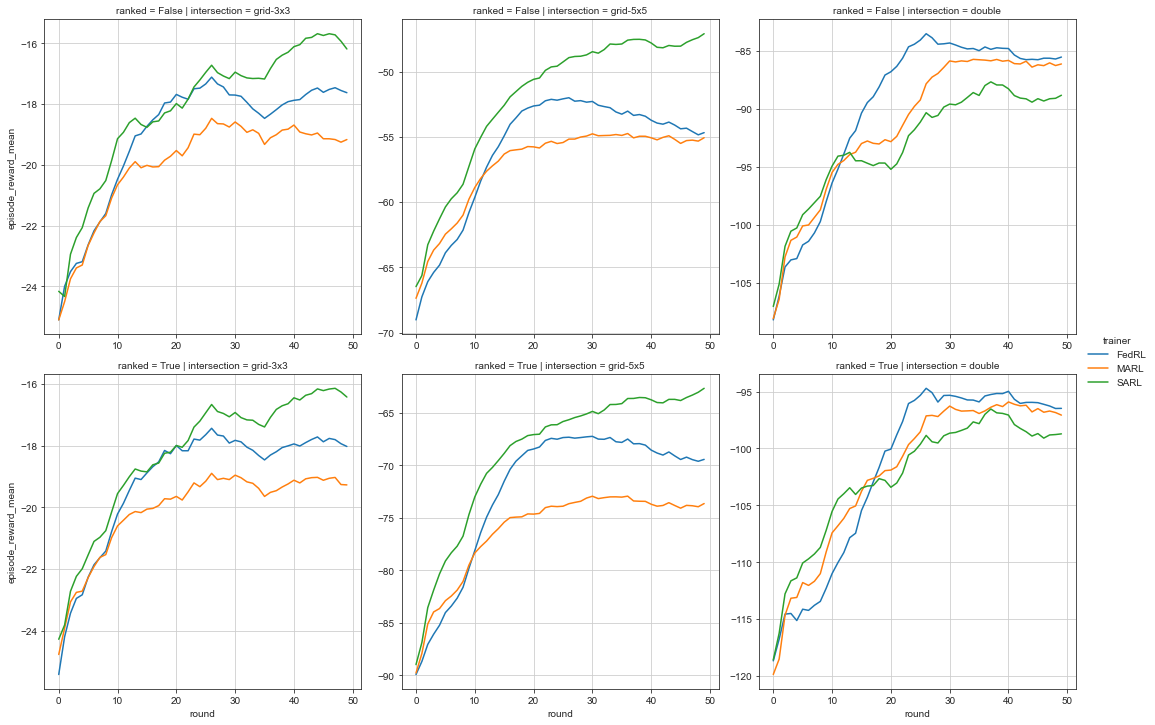

In [5]:
f = sns.relplot(
    data=df,#.query("weight_aggr_fn'"), 
    kind="line", 
    x="round", 
    y="episode_reward_mean", 
    hue="trainer", 
    # style="weight_aggr_fn", 
    row="ranked", 
    col="intersection",
    facet_kws={"sharey": False, "sharex": False},
    ci=None
)
sns.despine(top=False, right=False, left=False, bottom=False)
plt.savefig("rewards.pdf")
plt.show()

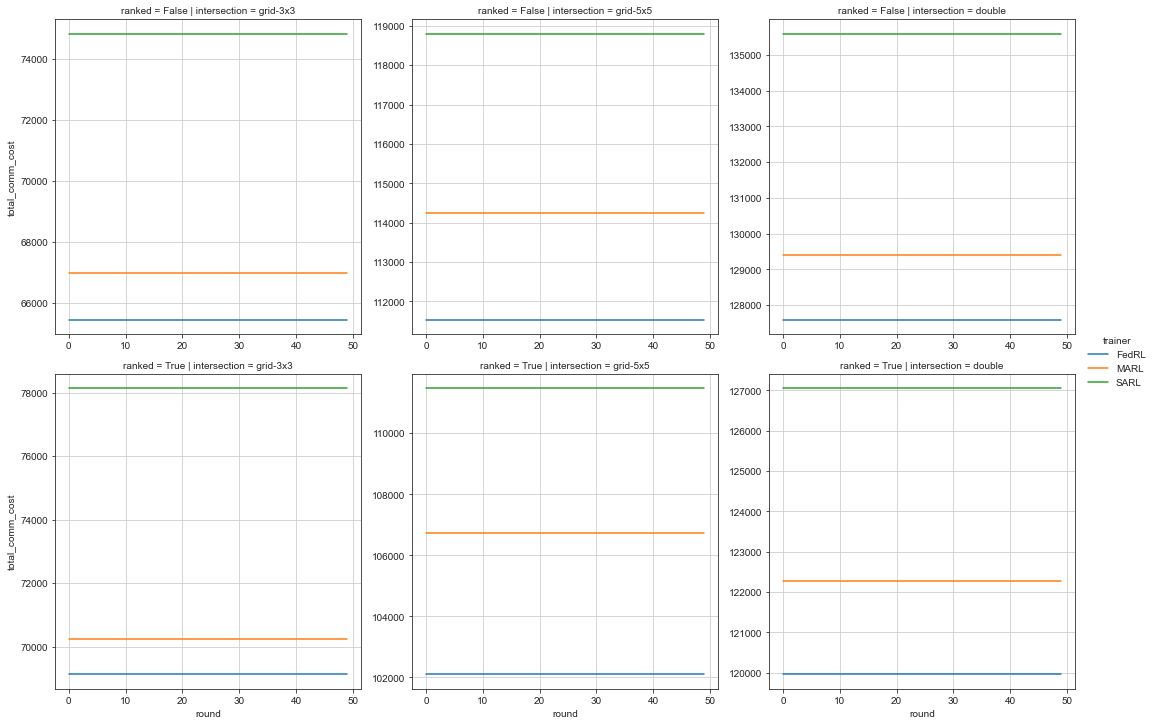

In [5]:
f = sns.relplot(
    data=df.query("weight_aggr_fn != 'neg_reward'"), 
    kind="line", 
    x="round", 
    y="total_comm_cost", 
    hue="trainer", 
    # style="weight_aggr_fn", 
    row="ranked", 
    col="intersection",
    facet_kws={"sharey": False, "sharex": False},
    ci=None
)
sns.despine(top=False, right=False, left=False, bottom=False)
plt.savefig("comm_cost.pdf")
plt.show()

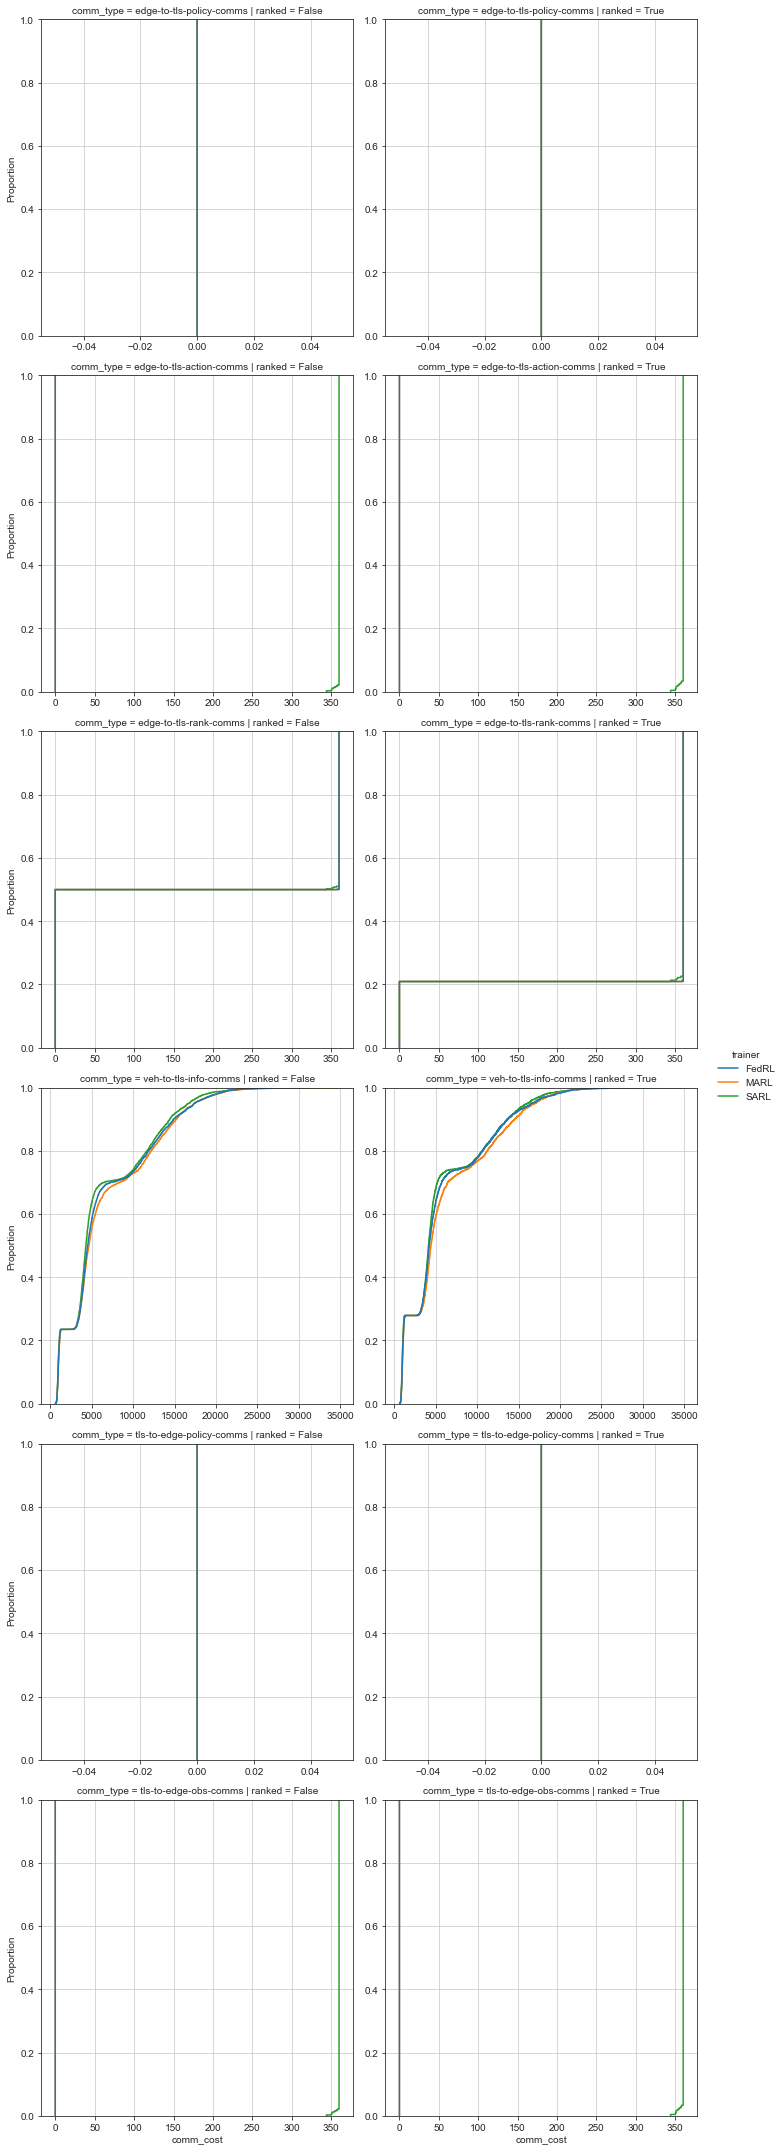

In [6]:
sns.displot(
    data=df.query("intersection == 'grid-5x5'"), 
    kind="ecdf", 
    x="comm_cost", 
    # style="comm_type", 
    col="ranked",
    row="comm_type", 
    # col="trainer",
    hue="trainer",
    # markers=True,
    facet_kws={"sharex": False, "sharey": False},
    # ci=None
)
sns.despine(top=False, right=False, left=False, bottom=False)
plt.show()

In [10]:
df.query("ranked == False and comm_type == 'edge-to-tls-rank-comms'")["comm_cost"]

90009      360
90010      360
90011      360
90012      360
90013      360
          ... 
2797107      0
2797108      0
2797109      0
2797110      0
2797111      0
Name: comm_cost, Length: 263070, dtype: int64